In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_csv('city_day.csv')

In [5]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

## Data Cleaning

In [13]:
df['PM2.5'].mean()

67.45057794890306

<Axes: >

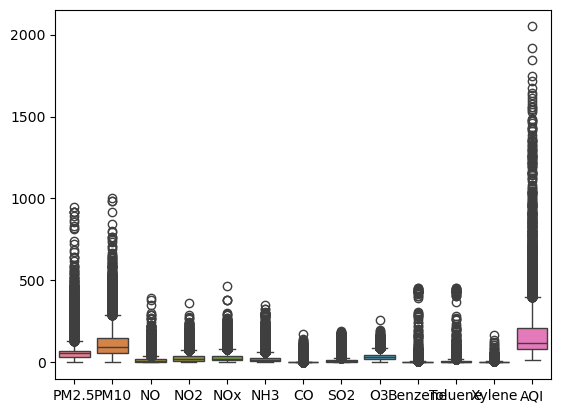

In [34]:
sns.boxplot(df)

##### As there are many outliers in dataset there we fill null values using median instead of mean. Outliers affect the mean due to extreme points

In [38]:
data=df

In [41]:
df_new=data.select_dtypes(include=['float64']).columns

In [43]:
data[df_new]=data[df_new].fillna(data[df_new].median())

In [57]:
data['AQI_Bucket'].mode()

0    Moderate
Name: AQI_Bucket, dtype: object

##### Categorical data's null values filled using mode.

In [63]:
data['AQI_Bucket']=data['AQI_Bucket'].fillna(data['AQI_Bucket'].mode()[0])

##### Checking the results....

In [65]:
data.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

##### Dropping the duplicates.

In [67]:
data=data.drop_duplicates()

## Data Transformation

In [81]:
data['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [83]:
data['AQI_Bucket'].unique().size

6

In [86]:
from sklearn.preprocessing import OrdinalEncoder

##### Applied one hot encoding to convert AQI_Bucket datatype to integer for easy processing. 
##### For each record the AQI will be either good,moderate,poor,very poor,satisfactory or severe. So it will indicate 1 and rest 0.

In [100]:
dmmis= pd.get_dummies(data, columns=['AQI_Bucket'],dtype=int)
dmmis

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,Ahmedabad,2015-01-01,67.450578,95.68,0.92,18.22,17.15,15.85,0.92,27.64,...,0.00,0.02,0.00,118.0,0,1,0,0,0,0
1,Ahmedabad,2015-01-02,67.450578,95.68,0.97,15.69,16.46,15.85,0.97,24.55,...,3.68,5.50,3.77,118.0,0,1,0,0,0,0
2,Ahmedabad,2015-01-03,67.450578,95.68,17.40,19.30,29.70,15.85,17.40,29.07,...,6.80,16.40,2.25,118.0,0,1,0,0,0,0
3,Ahmedabad,2015-01-04,67.450578,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,4.43,10.14,1.00,118.0,0,1,0,0,0,0
4,Ahmedabad,2015-01-05,67.450578,95.68,22.10,21.42,37.76,15.85,22.10,39.33,...,7.01,18.89,2.78,118.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.94,7.68,25.06,19.54,12.47,0.47,8.55,...,2.24,12.07,0.73,41.0,1,0,0,0,0,0
29527,Visakhapatnam,2020-06-28,24.380000,74.09,3.42,26.06,16.53,11.99,0.52,12.72,...,0.74,2.21,0.38,70.0,0,0,0,1,0,0
29528,Visakhapatnam,2020-06-29,22.910000,65.73,3.45,29.53,18.33,10.71,0.48,8.42,...,0.01,0.01,0.00,68.0,0,0,0,1,0,0
29529,Visakhapatnam,2020-06-30,16.640000,49.97,4.05,29.26,18.80,10.03,0.52,9.84,...,0.00,0.00,0.00,54.0,0,0,0,1,0,0


In [107]:
data_1=dmmis

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
numeric=['PM2.5', 'PM10' ,'NO', 'NO2', 'NOx', 'NH3', 'CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket_Moderate','AQI_Bucket_Poor','AQI_Bucket_Satisfactory','AQI_Bucket_Severe','AQI_Bucket_Very Poor']
scaler=MinMaxScaler()
data_1[numeric]=scaler.fit_transform(data_1[numeric])

In [117]:
data_1.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
0,Ahmedabad,2015-01-01,0.070962,0.095671,0.002304,0.050276,0.036674,0.044888,0.005233,0.142533,...,0.000000,0.000044,0.000000,0.051572,0,1.0,0.0,0.0,0.0,0.0
1,Ahmedabad,2015-01-02,0.070962,0.095671,0.002432,0.043291,0.035199,0.044888,0.005517,0.126593,...,0.008087,0.012092,0.022128,0.051572,0,1.0,0.0,0.0,0.0,0.0
2,Ahmedabad,2015-01-03,0.070962,0.095671,0.044489,0.053258,0.063512,0.044888,0.098970,0.149910,...,0.014944,0.036056,0.013207,0.051572,0,1.0,0.0,0.0,0.0,0.0
3,Ahmedabad,2015-01-04,0.070962,0.095671,0.004300,0.050994,0.038428,0.044888,0.009670,0.095847,...,0.009736,0.022293,0.005870,0.051572,0,1.0,0.0,0.0,0.0,0.0
4,Ahmedabad,2015-01-05,0.070962,0.095671,0.056520,0.059111,0.080748,0.044888,0.125704,0.202837,...,0.015406,0.041530,0.016317,0.051572,0,1.0,0.0,0.0,0.0,0.0
5,Ahmedabad,2015-01-06,0.070962,0.095671,0.116188,0.106212,0.174283,0.044888,0.258290,0.236007,...,0.011911,0.023810,0.011328,0.051572,0,1.0,0.0,0.0,0.0,0.0
6,Ahmedabad,2015-01-07,0.070962,0.095671,0.287053,0.112120,0.279644,0.044888,0.637961,0.166469,...,0.000000,0.000000,0.000000,0.051572,0,1.0,0.0,0.0,0.0,0.0
7,Ahmedabad,2015-01-08,0.070962,0.095671,0.206957,0.101408,0.206894,0.044888,0.459985,0.198762,...,0.000000,0.000000,0.000000,0.051572,0,1.0,0.0,0.0,0.0,0.0
8,Ahmedabad,2015-01-09,0.070962,0.095671,0.074592,0.085560,0.102645,0.044888,0.165861,0.302657,...,0.000000,0.000000,0.000000,0.051572,0,1.0,0.0,0.0,0.0,0.0
9,Ahmedabad,2015-01-10,0.070962,0.095671,0.025265,0.019409,0.000000,0.044888,0.005062,0.042713,...,0.000000,0.000000,0.000000,0.051572,0,1.0,0.0,0.0,0.0,0.0
